# Proyecto Regresion Lineal

Video expliación <https://youtu.be/qOvlJqvURMA>

In [9]:
#Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
#Importar el Dataset

dataset = np.load("/Users/diegoalvarez/Documents/Maestria/Python/Proyecto/proyecto_training_data.npy")

In [11]:
SP = dataset[:, 0]
OQ = dataset[:, 1]
FFSF = dataset[:, 2]
TRAG = dataset[:, 3]
YB = dataset[:, 4]
LF = dataset[:, 5]
print(SP)
print(OQ)
print(FFSF)
print(TRAG)
print(YB)
print(LF)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
[7. 6. 7. ... 7. 5. 5.]
[ 856. 1262.  920. ... 1188. 1078. 1256.]
[8. 6. 6. ... 9. 5. 6.]
[2003. 1976. 2001. ... 1941. 1950. 1965.]
[65. 80. 68. ... 66. 68. 75.]


In [12]:
dframe = {'SP': (SP),
                 'OQ': (OQ),
                 'FFSF': (FFSF),
                 'TRAG': (TRAG),
                 'YB': (YB),
                 'LF': (LF)
            }
df = pd.DataFrame(dframe)
df     

,SP,OQ,FFSF,TRAG,YB,LF
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [13]:
#Revisión de datos NaN
porcentaje_nan_s = (df['SP'].isna().sum() / len(df['SP'])) * 100
porcentaje_nan_o = (df['OQ'].isna().sum() / len(df['OQ'])) * 100
porcentaje_nan_f = (df['FFSF'].isna().sum() / len(df['FFSF'])) * 100
porcentaje_nan_t = (df['TRAG'].isna().sum() / len(df['TRAG'])) * 100
porcentaje_nan_y = (df['YB'].isna().sum() / len(df['YB'])) * 100
porcentaje_nan_l = (df['LF'].isna().sum() / len(df['LF'])) * 100
print(f'El porcentaje de valores NaN en la variable SalePrice es: {porcentaje_nan_s:.2f}%')
print(f'El porcentaje de valores NaN en la variable OverallQual es: {porcentaje_nan_o:.2f}%')
print(f'El porcentaje de valores NaN en la variable FstFlrSF es: {porcentaje_nan_f:.2f}%')
print(f'El porcentaje de valores NaN en la variable TotRmsAbvGrd es: {porcentaje_nan_t:.2f}%')
print(f'El porcentaje de valores NaN en la variable YearBuilt es: {porcentaje_nan_y:.2f}%')
print(f'El porcentaje de valores NaN en la variable LotFrontage es: {porcentaje_nan_l:.2f}%')

El porcentaje de valores NaN en la variable SalePrice es: 0.00%
El porcentaje de valores NaN en la variable OverallQual es: 0.00%
El porcentaje de valores NaN en la variable FstFlrSF es: 0.00%
El porcentaje de valores NaN en la variable TotRmsAbvGrd es: 0.00%
El porcentaje de valores NaN en la variable YearBuilt es: 0.00%
El porcentaje de valores NaN en la variable LotFrontage es: 17.74%


LotFrontage: 
Media: 70.04995836802665 
Mediana: 69.0 
Máximo: 313.0 
Mínimo: 21.0



/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


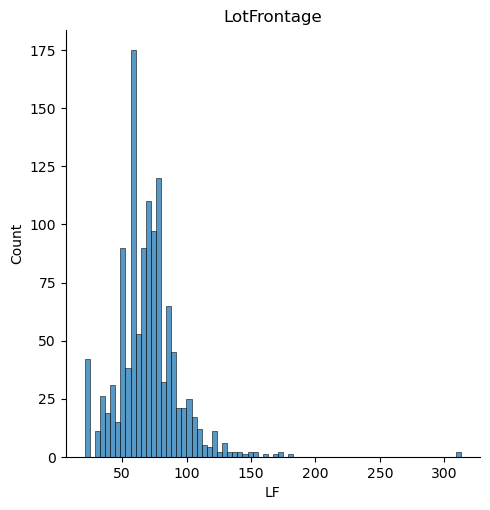

In [14]:
#Análisis de la varible con Nan

LFM = np.nanmean(LF)
LFMD = np.nanmedian(LF)
LFMX = np.nanmax(LF)
LFMN = np.nanmin(LF)
print('LotFrontage:','\n''Media:', LFM,'\n''Mediana:', LFMD, '\n''Máximo:', LFMX,'\n''Mínimo:', LFMN)
print()

gfs = sns.displot(df['LF'])
gfs.set(title='LotFrontage')
plt.show()

In [15]:
#Imputamos los datos NaN

dt_imputados = np.where(np.isnan(dataset), LFMD, dataset)
print(dt_imputados)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [16]:
df_ma = pd.DataFrame(dt_imputados, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_ma

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [17]:
porcentaje_nan_si = (df_ma['SalePrice'].isna().sum() / len(df['SP'])) * 100
porcentaje_nan_oi = (df_ma['OverallQual'].isna().sum() / len(df['OQ'])) * 100
porcentaje_nan_fi = (df_ma['FstFlrSF'].isna().sum() / len(df['FFSF'])) * 100
porcentaje_nan_ti = (df_ma['TotRmsAbvGrd'].isna().sum() / len(df['TRAG'])) * 100
porcentaje_nan_yi = (df_ma['YearBuilt'].isna().sum() / len(df['YB'])) * 100
porcentaje_nan_li = (df_ma['LotFrontage'].isna().sum() / len(df['LF'])) * 100
print(f'El porcentaje de valores NaN en la variable SalePrice es: {porcentaje_nan_si:.2f}%')
print(f'El porcentaje de valores NaN en la variable OverallQual es: {porcentaje_nan_oi:.2f}%')
print(f'El porcentaje de valores NaN en la variable FstFlrSF es: {porcentaje_nan_fi:.2f}%')
print(f'El porcentaje de valores NaN en la variable TotRmsAbvGrd es: {porcentaje_nan_ti:.2f}%')
print(f'El porcentaje de valores NaN en la variable YearBuilt es: {porcentaje_nan_yi:.2f}%')
print(f'El porcentaje de valores NaN en la variable LotFrontage es: {porcentaje_nan_li:.2f}%')

El porcentaje de valores NaN en la variable SalePrice es: 0.00%
El porcentaje de valores NaN en la variable OverallQual es: 0.00%
El porcentaje de valores NaN en la variable FstFlrSF es: 0.00%
El porcentaje de valores NaN en la variable TotRmsAbvGrd es: 0.00%
El porcentaje de valores NaN en la variable YearBuilt es: 0.00%
El porcentaje de valores NaN en la variable LotFrontage es: 0.00%


In [18]:
print("Dividiendo datos en entrenamiento y validación...")
data_entre, data_val = train_test_split(dt_imputados, test_size=0.2, random_state=42)

Dividiendo datos en entrenamiento y validación...


In [19]:
print("Dimensiones del conjunto de entrenamiento:", data_entre.shape)
print("Dimensiones del conjunto de validación/pruebas:", data_val.shape)

Dimensiones del conjunto de entrenamiento: (1168, 6)
Dimensiones del conjunto de validación/pruebas: (292, 6)


In [20]:
#Exploración de variables
def calcular_estadisticas(df, columnas):
    estadisticas = {}
    for columna in columnas:
        estadisticas[columna] = {
            'media': df[columna].mean(),
            'maximo': df[columna].max(),
            'minimo': df[columna].min(),
            'rango': df[columna].max() - df[columna].min(),
            'desviacion_estandar': df[columna].std()
        }
    return estadisticas

columnas_a_calcular = ["SalePrice", "OverallQual", "FstFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

estadisticas = calcular_estadisticas(df_ma, columnas_a_calcular)

for columna, valores in estadisticas.items():
    print(f"Estadísticas para '{columna}':")
    print(f"  Media: {valores['media']}")
    print(f"  Máximo: {valores['maximo']}")
    print(f"  Mínimo: {valores['minimo']}")
    print(f"  Rango: {valores['rango']}")
    print(f"  Desviación estándar: {valores['desviacion_estandar']}")
    print()

Estadísticas para 'SalePrice':
  Media: 180921.19589041095
  Máximo: 755000.0
  Mínimo: 34900.0
  Rango: 720100.0
  Desviación estándar: 79442.50288288663

Estadísticas para 'OverallQual':
  Media: 6.0993150684931505
  Máximo: 10.0
  Mínimo: 1.0
  Rango: 9.0
  Desviación estándar: 1.3829965467415923

Estadísticas para 'FstFlrSF':
  Media: 1162.626712328767
  Máximo: 4692.0
  Mínimo: 334.0
  Rango: 4358.0
  Desviación estándar: 386.5877380410738

Estadísticas para 'TotRmsAbvGrd':
  Media: 6.517808219178082
  Máximo: 14.0
  Mínimo: 2.0
  Rango: 12.0
  Desviación estándar: 1.625393290584064

Estadísticas para 'YearBuilt':
  Media: 1971.267808219178
  Máximo: 2010.0
  Mínimo: 1872.0
  Rango: 138.0
  Desviación estándar: 30.202904042525265

Estadísticas para 'LotFrontage':
  Media: 69.86369863013698
  Máximo: 313.0
  Mínimo: 21.0
  Rango: 292.0
  Desviación estándar: 22.027677088952412



/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


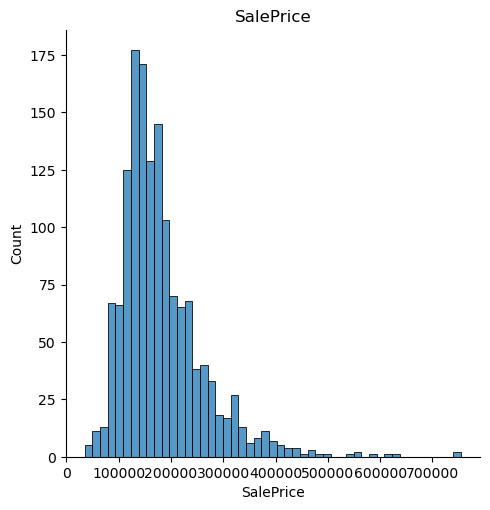

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


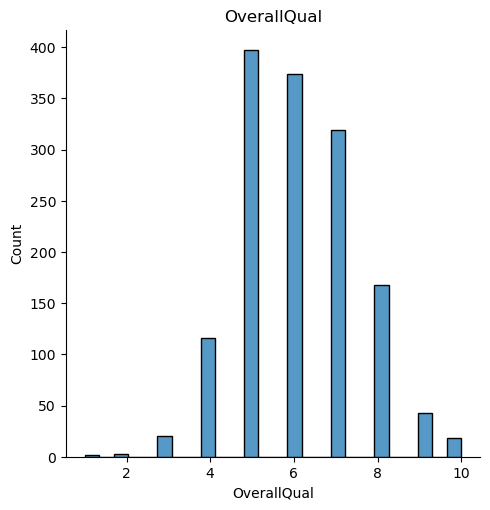

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


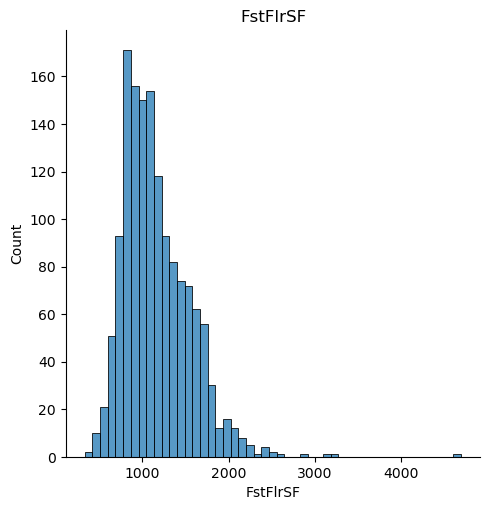

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


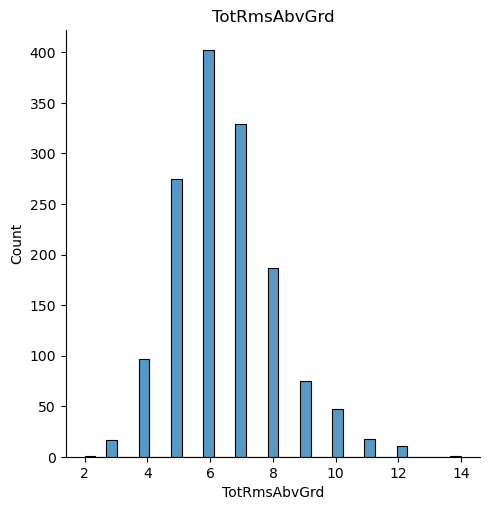

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


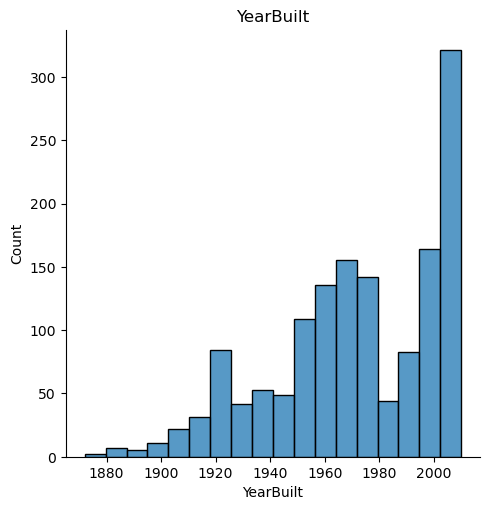

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


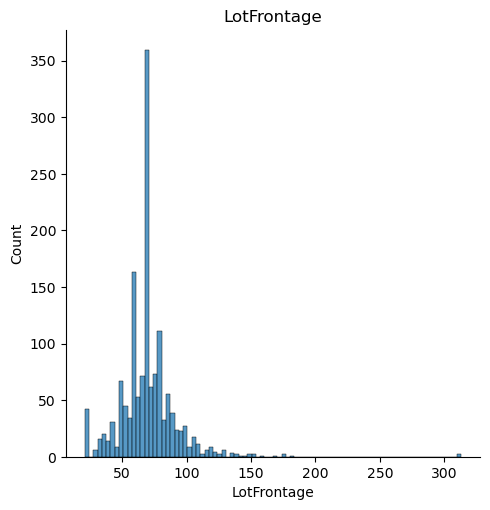

In [21]:
#Histogramas de Variables

gfs = sns.displot(df_ma['SalePrice'])
gfs.set(title='SalePrice')
plt.show()
print()
gfo = sns.displot(df_ma['OverallQual'])
gfo.set(title='OverallQual')
plt.show()
print()
gff = sns.displot(df_ma['FstFlrSF'])
gff.set(title='FstFlrSF')
plt.show()
print()
gft = sns.displot(df_ma['TotRmsAbvGrd'])
gft.set(title='TotRmsAbvGrd')
plt.show()
print()
gfy = sns.displot(df_ma['YearBuilt'])
gfy.set(title='YearBuilt')
plt.show()
print()
gfs = sns.displot(df_ma['LotFrontage'])
gfs.set(title='LotFrontage')
plt.show()

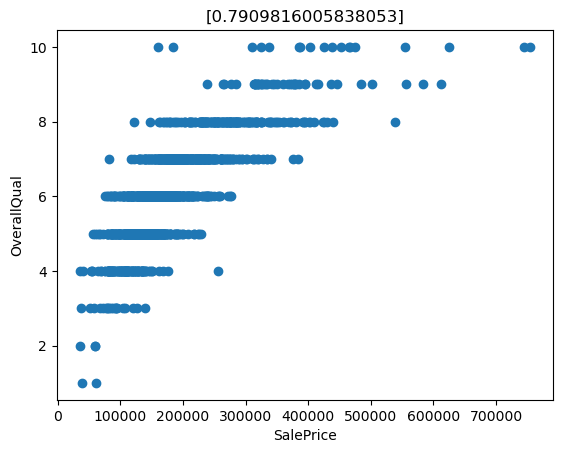

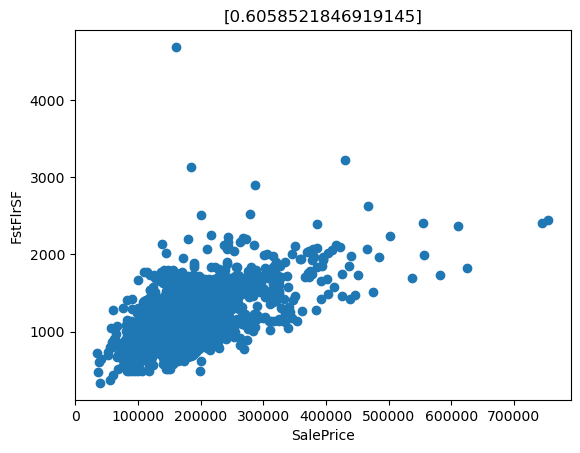

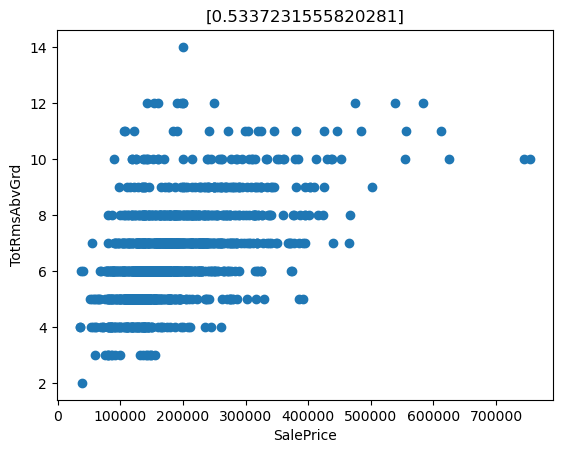

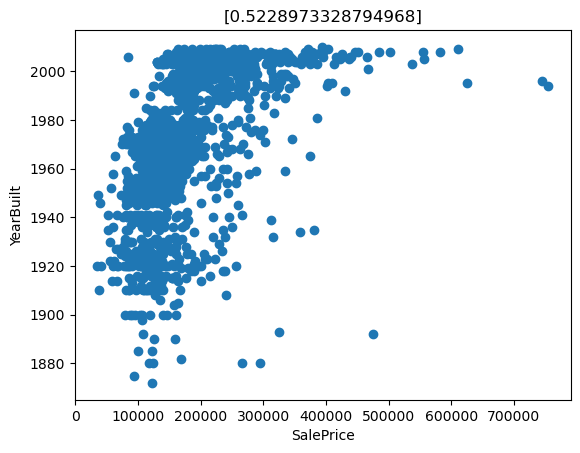

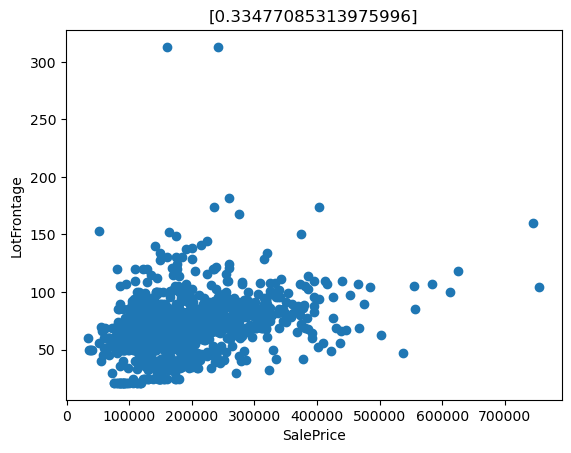

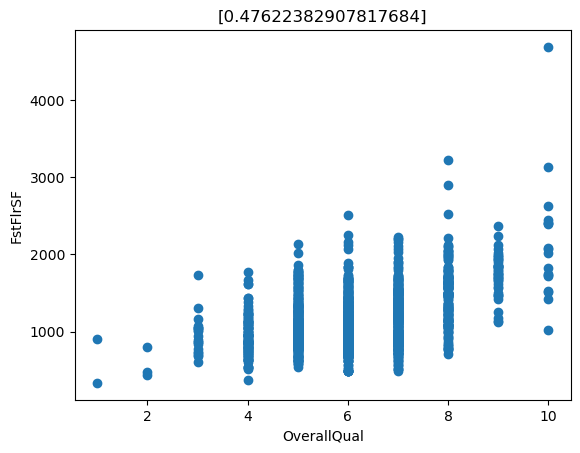

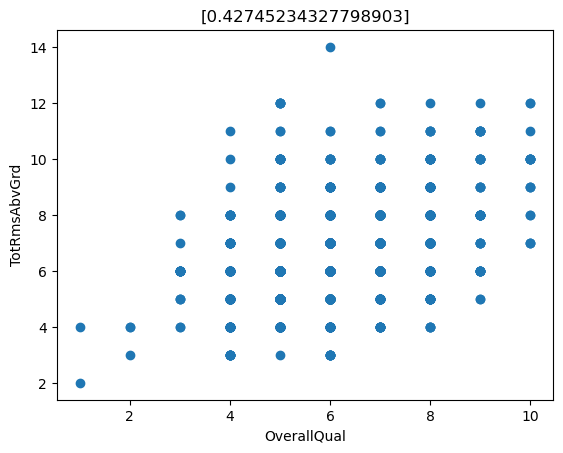

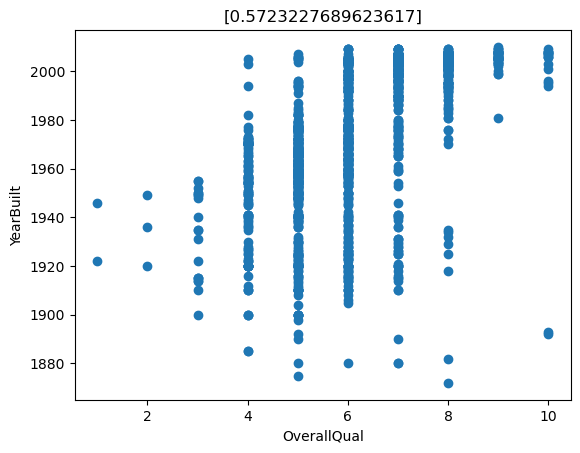

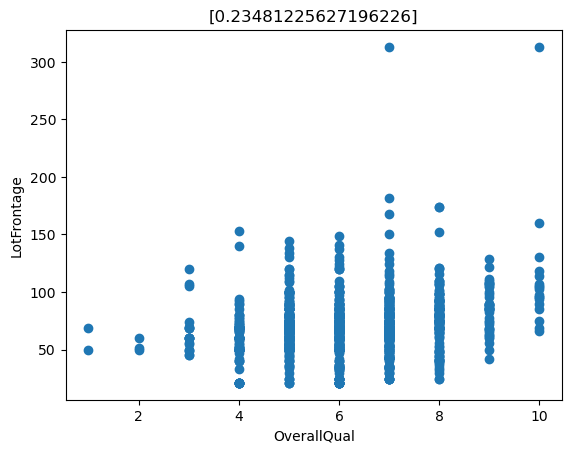

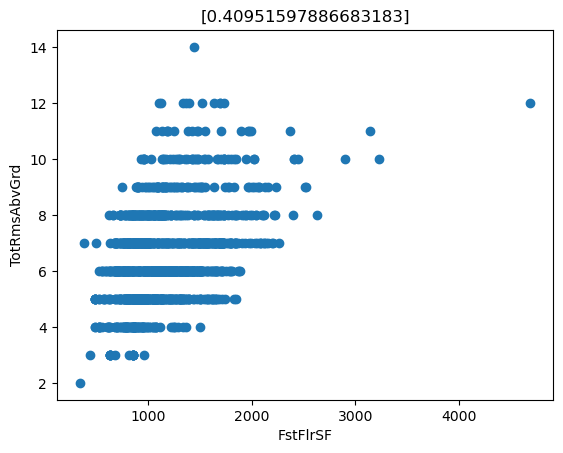

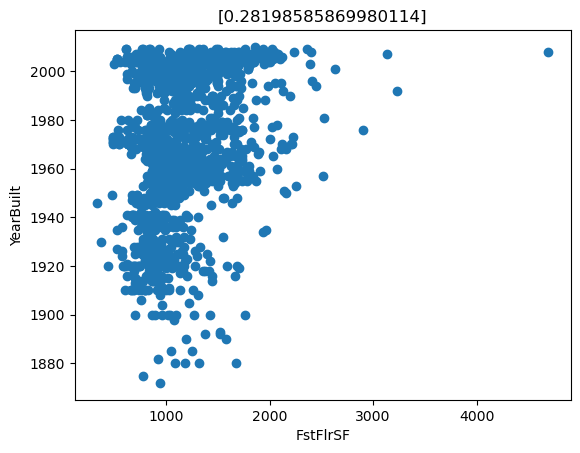

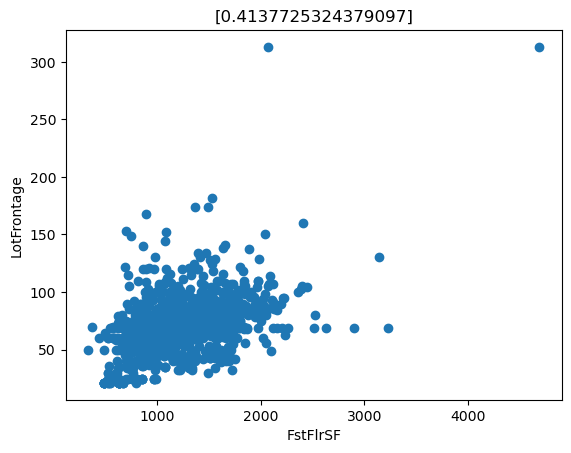

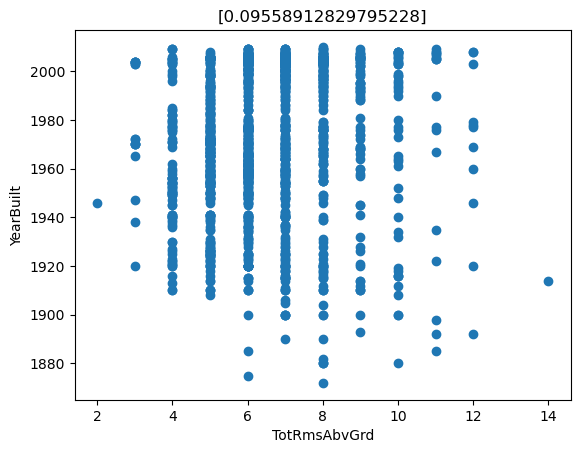

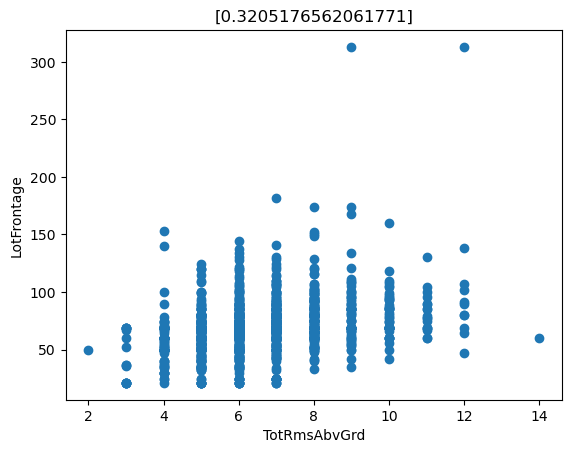

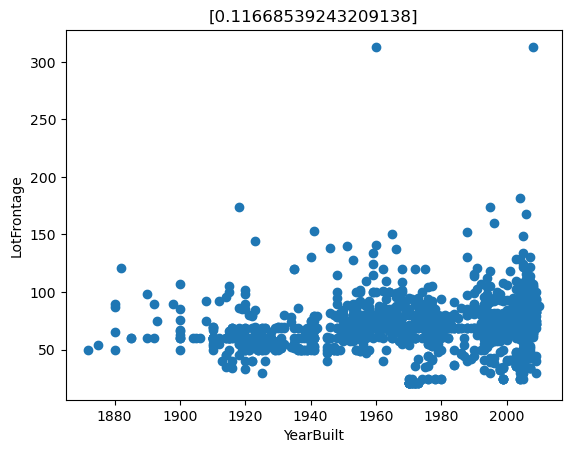

In [22]:
#Correlación

def tr_corr(x, y, x_label, y_label):
    cc = np.corrcoef(x, y)[0, 1]
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title([cc])
    plt.show()
    print()

#Correlación para Variables
tr_corr(df_ma['SalePrice'], df_ma['OverallQual'], 'SalePrice', 'OverallQual')
tr_corr(df_ma['SalePrice'], df_ma['FstFlrSF'], 'SalePrice', 'FstFlrSF')
tr_corr(df_ma['SalePrice'], df_ma['TotRmsAbvGrd'], 'SalePrice', 'TotRmsAbvGrd')
tr_corr(df_ma['SalePrice'], df_ma['YearBuilt'], 'SalePrice', 'YearBuilt')
tr_corr(df_ma['SalePrice'], df_ma['LotFrontage'], 'SalePrice', 'LotFrontage')
tr_corr(df_ma['OverallQual'], df_ma['FstFlrSF'], 'OverallQual', 'FstFlrSF')
tr_corr(df_ma['OverallQual'], df_ma['TotRmsAbvGrd'], 'OverallQual', 'TotRmsAbvGrd')
tr_corr(df_ma['OverallQual'], df_ma['YearBuilt'], 'OverallQual', 'YearBuilt')
tr_corr(df_ma['OverallQual'], df_ma['LotFrontage'], 'OverallQual', 'LotFrontage')
tr_corr(df_ma['FstFlrSF'], df_ma['TotRmsAbvGrd'], 'FstFlrSF', 'TotRmsAbvGrd')
tr_corr(df_ma['FstFlrSF'], df_ma['YearBuilt'], 'FstFlrSF', 'YearBuilt')
tr_corr(df_ma['FstFlrSF'], df_ma['LotFrontage'], 'FstFlrSF', 'LotFrontage')
tr_corr(df_ma['TotRmsAbvGrd'], df_ma['YearBuilt'], 'TotRmsAbvGrd', 'YearBuilt')
tr_corr(df_ma['TotRmsAbvGrd'], df_ma['LotFrontage'], 'TotRmsAbvGrd', 'LotFrontage')
tr_corr(df_ma['YearBuilt'], df_ma['LotFrontage'], 'YearBuilt', 'LotFrontage')

In [23]:
#Definición de Funciones
class LinearRegressionModel:
    def __init__(self):
        self.coefficients = None

    def train(self, x, y, epochs, print_error_each, alpha):
        X = np.column_stack((x, np.ones_like(x)))
        num_samples, num_features = X.shape
        self.coefficients = np.zeros(num_features)
        errors = []

        models = {}  # Almacenar los modelos entrenados en cada iteración

        for epoch in range(epochs):
            y_pred = np.dot(X, self.coefficients)
            error = np.mean((y_pred - y) ** 2)
            errors.append(error)

            gradient = np.dot(X.T, y_pred - y) / num_samples
            self.coefficients -= alpha * gradient

            models[epoch + 1] = self.coefficients.copy()

            if (epoch + 1) % print_error_each == 0:
                print(f"Iteración {epoch + 1}: Error = {error}")

        return models, errors

    def predict(self, x):
        X = np.column_stack((x, np.ones_like(x)))
        return np.dot(X, self.coefficients)

In [24]:
#Dataframe para Entrenamiento y Validacion
df_tr = pd.DataFrame(data_entre, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_val = pd.DataFrame(data_val, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

Entrenando modelos para la variable OverallQual...
Entrenando modelo manualmente...
Iteración 5: Error = 38873923507.42819
Iteración 10: Error = 38859353769.46488
Iteración 15: Error = 38844789901.39199
Iteración 20: Error = 38830231900.84459
Iteración 25: Error = 38815679765.45874
Iteración 30: Error = 38801133492.871445
Iteración 35: Error = 38786593080.720634
Iteración 40: Error = 38772058526.64522
Iteración 45: Error = 38757529828.285065
Iteración 50: Error = 38743006983.28095
Iteración 55: Error = 38728489989.27466
Iteración 60: Error = 38713978843.90887
Iteración 65: Error = 38699473544.82724
Iteración 70: Error = 38684974089.67439
Iteración 75: Error = 38670480476.09585
Iteración 80: Error = 38655992701.73814
Iteración 85: Error = 38641510764.248695
Iteración 90: Error = 38627034661.275925
Iteración 95: Error = 38612564390.46916
Iteración 100: Error = 38598099949.47871


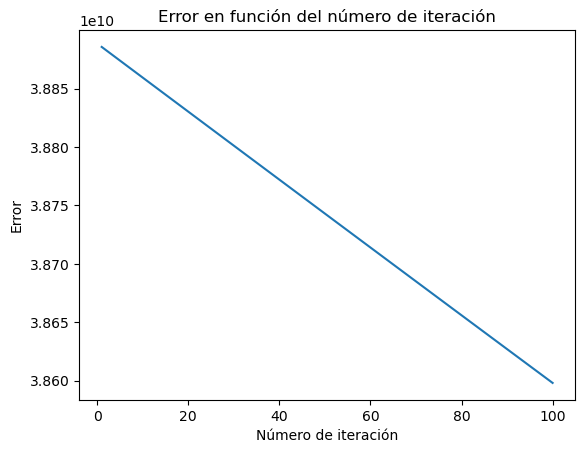

Visualizando cómo evoluciona el modelo entrenado en el tiempo...


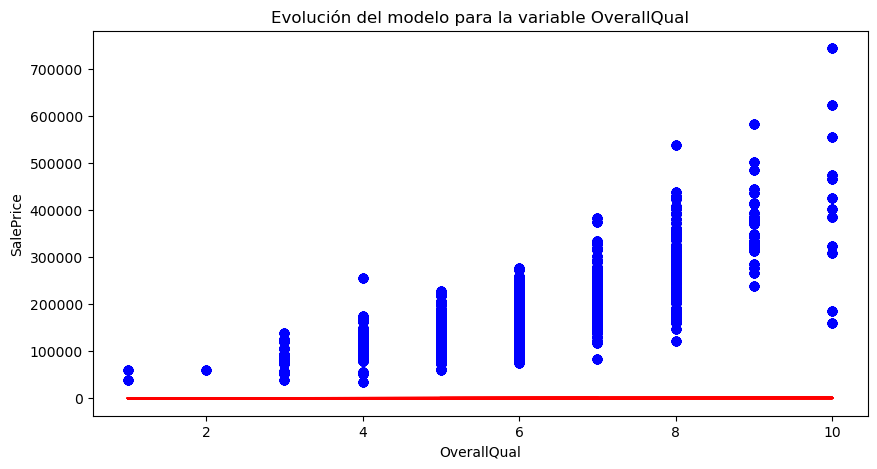

Entrenando modelos para la variable FstFlrSF...
Entrenando modelo manualmente...
Iteración 5: Error = 4271507864.7642436
Iteración 10: Error = 4094771266.312577
Iteración 15: Error = 4094530980.627759
Iteración 20: Error = 4094530465.9718404
Iteración 25: Error = 4094530277.046119
Iteración 30: Error = 4094530088.5630894
Iteración 35: Error = 4094529900.0808463
Iteración 40: Error = 4094529711.5987916
Iteración 45: Error = 4094529523.11692
Iteración 50: Error = 4094529334.6352353
Iteración 55: Error = 4094529146.1537366
Iteración 60: Error = 4094528957.6724234
Iteración 65: Error = 4094528769.191295
Iteración 70: Error = 4094528580.710353
Iteración 75: Error = 4094528392.2295966
Iteración 80: Error = 4094528203.749026
Iteración 85: Error = 4094528015.26864
Iteración 90: Error = 4094527826.78844
Iteración 95: Error = 4094527638.3084264
Iteración 100: Error = 4094527449.828598


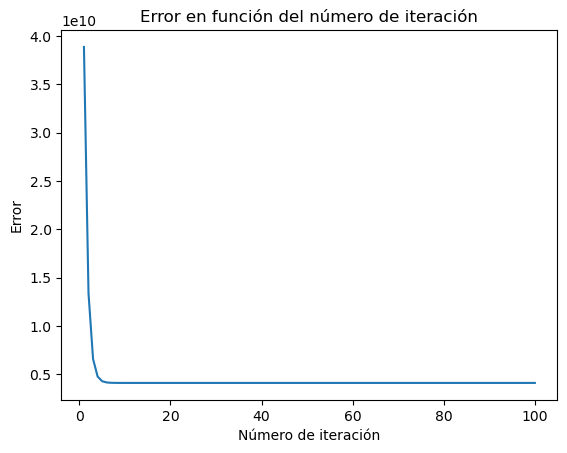

Visualizando cómo evoluciona el modelo entrenado en el tiempo...


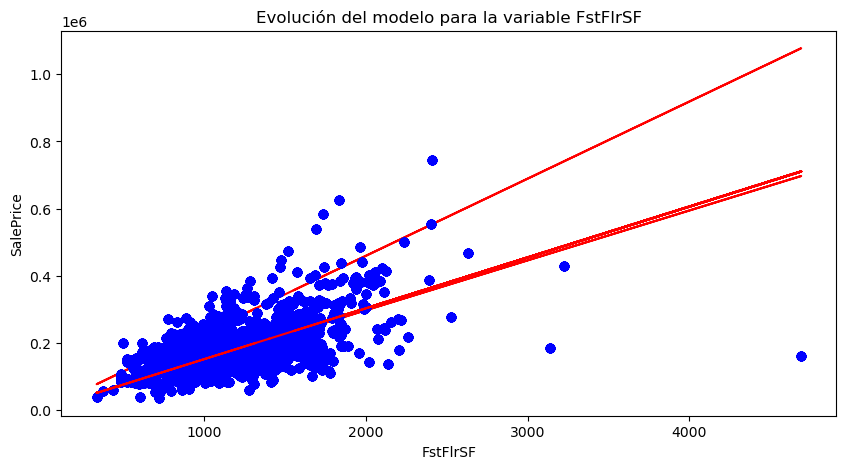

Entrenando modelos para la variable TotRmsAbvGrd...
Entrenando modelo manualmente...
Iteración 5: Error = 38872709552.45364
Iteración 10: Error = 38856623836.667305
Iteración 15: Error = 38840545618.48873
Iteración 20: Error = 38824474894.423256
Iteración 25: Error = 38808411660.97784
Iteración 30: Error = 38792355914.66108
Iteración 35: Error = 38776307651.98321
Iteración 40: Error = 38760266869.45606
Iteración 45: Error = 38744233563.593124
Iteración 50: Error = 38728207730.909485
Iteración 55: Error = 38712189367.921875
Iteración 60: Error = 38696178471.14864
Iteración 65: Error = 38680175037.109764
Iteración 70: Error = 38664179062.32681
Iteración 75: Error = 38648190543.32301
Iteración 80: Error = 38632209476.62319
Iteración 85: Error = 38616235858.75382
Iteración 90: Error = 38600269686.242966
Iteración 95: Error = 38584310955.62031
Iteración 100: Error = 38568359663.41715


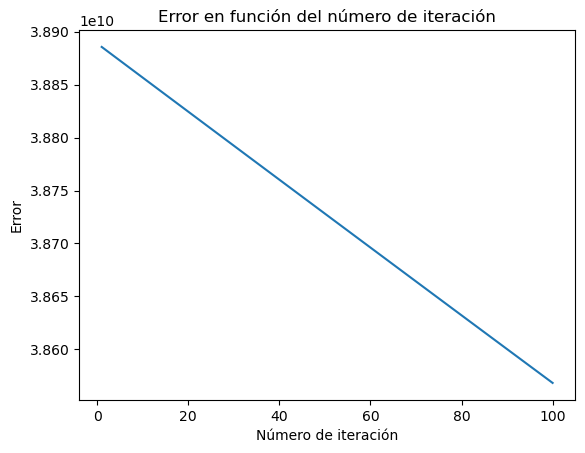

Visualizando cómo evoluciona el modelo entrenado en el tiempo...


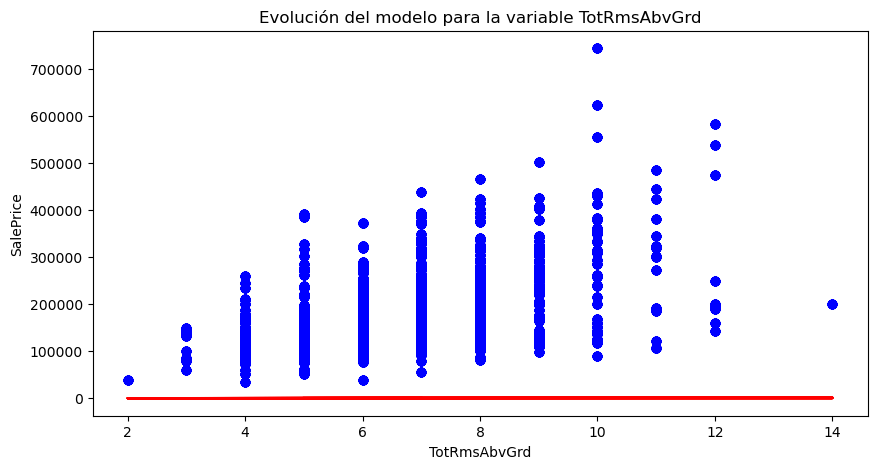

Entrenando modelos para la variable YearBuilt...
Entrenando modelo manualmente...
Iteración 5: Error = 159329257814192.5
Iteración 10: Error = 6.378406159803796e+18
Iteración 15: Error = 2.5535506251741603e+23
Iteración 20: Error = 1.0222962661572982e+28
Iteración 25: Error = 4.092692134223498e+32
Iteración 30: Error = 1.6384808846555995e+37
Iteración 35: Error = 6.559544479128246e+41
Iteración 40: Error = 2.6260680961625486e+46
Iteración 45: Error = 1.0513281322545846e+51
Iteración 50: Error = 4.208919194765248e+55
Iteración 55: Error = 1.685011581500564e+60
Iteración 60: Error = 6.745826893807433e+64
Iteración 65: Error = 2.700644967715389e+69
Iteración 70: Error = 1.0811844650715366e+74
Iteración 75: Error = 4.328446950584799e+78
Iteración 80: Error = 1.7328636887867242e+83
Iteración 85: Error = 6.937399483456352e+87
Iteración 90: Error = 2.7773397240932394e+92
Iteración 95: Error = 1.1118886783759332e+97
Iteración 100: Error = 4.4513691370768095e+101


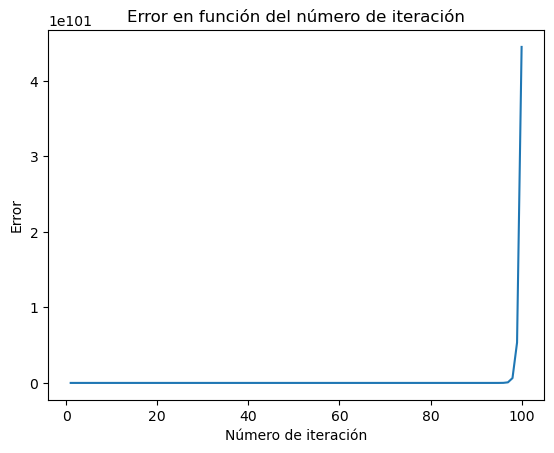

Visualizando cómo evoluciona el modelo entrenado en el tiempo...


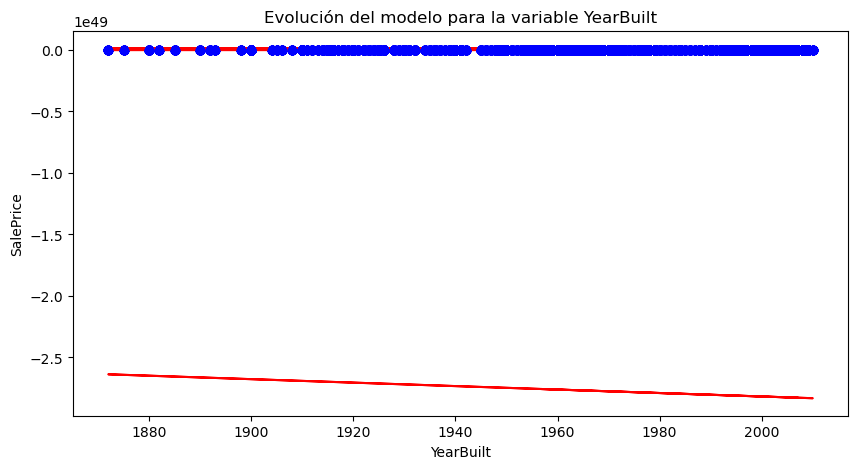

Entrenando modelos para la variable LotFrontage...
Entrenando modelo manualmente...
Iteración 5: Error = 37505207927.11137
Iteración 10: Error = 35862010470.908394
Iteración 15: Error = 34305710348.214035
Iteración 20: Error = 32831712158.133186
Iteración 25: Error = 31435663518.84319
Iteración 30: Error = 30113442215.990482
Iteración 35: Error = 28861144030.719906
Iteración 40: Error = 27675071211.39571
Iteración 45: Error = 26551721554.973686
Iteración 50: Error = 25487778065.784283
Iteración 55: Error = 24480099161.191406
Iteración 60: Error = 23525709395.206367
Iteración 65: Error = 22621790672.665962
Iteración 70: Error = 21765673928.032085
Iteración 75: Error = 20954831244.242306
Iteración 80: Error = 20186868388.34003
Iteración 85: Error = 19459517741.843796
Iteración 90: Error = 18770631604.980564
Iteración 95: Error = 18118175855.01195
Iteración 100: Error = 17500223939.927868


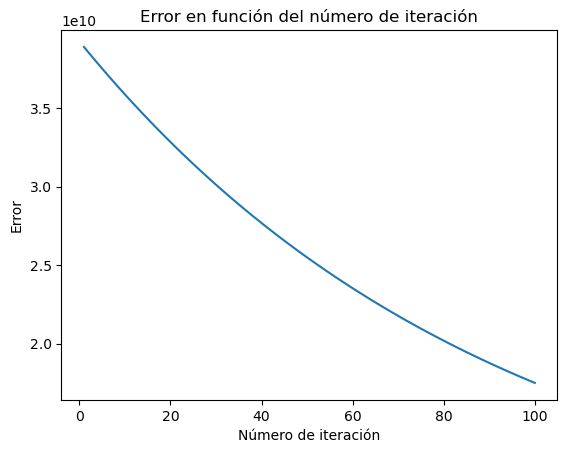

Visualizando cómo evoluciona el modelo entrenado en el tiempo...


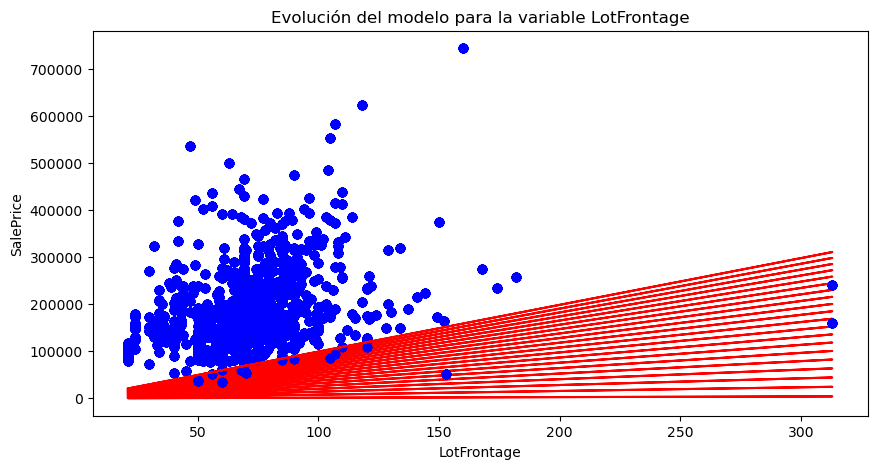

In [28]:
# Función para entrenar modelos de regresión lineal manualmente
def train_manual_model(x_train, y_train, x_val, y_val, epochs, print_error_each, alpha):
    model = LinearRegressionModel()
    models, errors = model.train(x_train, y_train, epochs=epochs, print_error_each=print_error_each, alpha=alpha)
    y_pred_manual = model.predict(x_val)
    return models, errors, y_pred_manual

# Función para visualizar cómo cambia el error en el tiempo
def plot_error_over_time(errors):
    plt.plot(range(1, len(errors) + 1), errors)
    plt.xlabel('Número de iteración')
    plt.ylabel('Error')
    plt.title('Error en función del número de iteración')
    plt.show()

# Función para visualizar cómo evoluciona el modelo entrenado en el tiempo
def plot_model_evolution(models, iterations_to_plot, current_variable):
    num_iterations = len(models)
    iterations = sorted(models.keys())

    plt.figure(figsize=(10, 5))
    for i in range(1, num_iterations + 1, iterations_to_plot):
        coeffs = models[i]
        plt.plot(df_tr[current_variable], df_tr['SalePrice'], 'bo', label='Datos de entrenamiento')
        plt.plot(df_tr[current_variable], coeffs[0] * df_tr[current_variable] + coeffs[1], 'r-', label=f'Iteración {i}')
    plt.xlabel(current_variable)
    plt.ylabel('SalePrice')
    plt.title(f'Evolución del modelo para la variable {current_variable}')
    plt.show()

# Entrenamiento de modelos y evaluación para cada variable x

variables_x = ['OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

for current_variable in variables_x:
    print(f"Entrenando modelos para la variable {current_variable}...")
    x_train = df_tr[current_variable].values
    y_train = df_tr['SalePrice'].values  
    x_val = df_val[current_variable].values
    y_val = df_val['SalePrice'].values

    print("Entrenando modelo manualmente...")
    models, errors, y_pred_manual = train_manual_model(x_train, y_train, x_val, y_val, epochs=100, print_error_each=5, alpha=0.000001)
    plot_error_over_time(errors)

    print("Visualizando cómo evoluciona el modelo entrenado en el tiempo...")
    plot_model_evolution(models, iterations_to_plot=5, current_variable=current_variable)
    
#Función de entrenamiento de scikit-learn de regreseión lineal

def train_sklearn_model(x_train, y_train, x_val):
    model = LinearRegression()
    model.fit(x_train.reshape(-1, 1), y_train)
    y_pred_sklearn = model.predict(x_val.reshape(-1, 1))
    return y_pred_sklearn

#Función para calcular predicciones combinadas

def combine_predictions(y_pred_manual, y_pred_sklearn):
    y_pred_combined = (y_pred_manual + y_pred_sklearn) / 2
    return y_pred_combined

#Función para calcular el error

def calculate_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

In [29]:
#Función para graficar el error de cada modelo para una variable x

def plot_model_error(x, y_true, y_pred_manual, y_pred_sklearn):
    error_manual = calculate_error(y_true, y_pred_manual)
    error_sklearn = calculate_error(y_true, y_pred_sklearn)
    plt.bar(['Modelo Manual', 'Scikit-learn'], [error_manual, error_sklearn])
    plt.xlabel('Modelo')
    plt.ylabel('Error')
    plt.title(f'Error para la variable {x}')
    plt.show()

Entrenando modelos para la variable OverallQual...
Entrenando modelo manualmente...
Entrenando modelo de scikit-learn...
Calculando predicciones combinadas...
Calculando errores...
Error del modelo manual: 18227310340.87736
Error del modelo de scikit-learn: 2681026163.509092
Error del modelo combinado: 6695345135.915991
Conclusión: El modelo de Scikit-learn es el mejor.


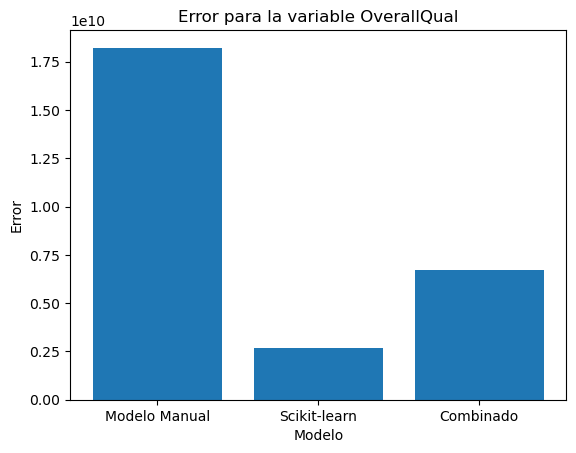

Entrenando modelos para la variable FstFlrSF...
Entrenando modelo manualmente...
Entrenando modelo de scikit-learn...
Calculando predicciones combinadas...
Calculando errores...
Error del modelo manual: 18227310340.87736
Error del modelo de scikit-learn: 4383846078.680038
Error del modelo combinado: 8040401880.190252
Conclusión: El modelo de Scikit-learn es el mejor.


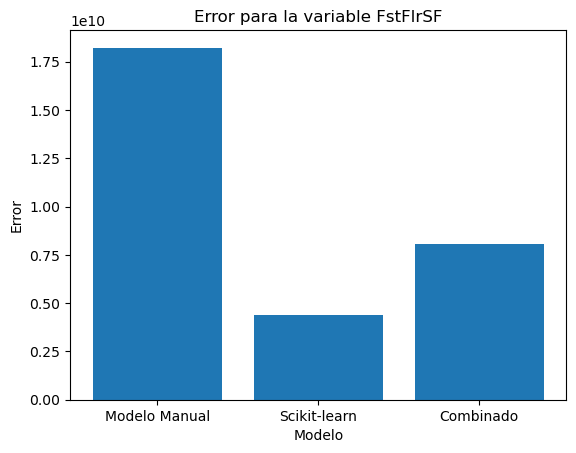

Entrenando modelos para la variable TotRmsAbvGrd...
Entrenando modelo manualmente...
Entrenando modelo de scikit-learn...
Calculando predicciones combinadas...
Calculando errores...
Error del modelo manual: 18227310340.87736
Error del modelo de scikit-learn: 5176521056.58883
Error del modelo combinado: 8585317185.679781
Conclusión: El modelo de Scikit-learn es el mejor.


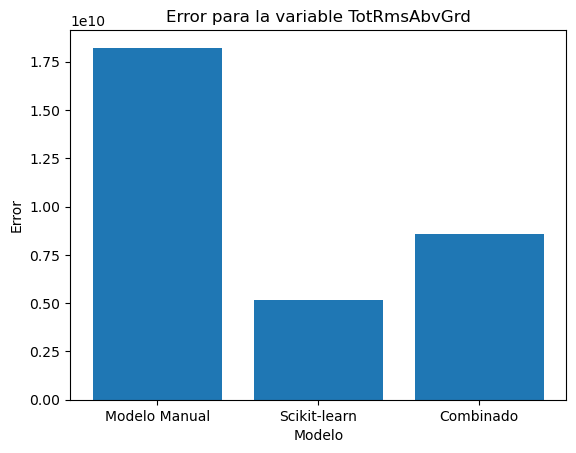

Entrenando modelos para la variable YearBuilt...
Entrenando modelo manualmente...
Entrenando modelo de scikit-learn...
Calculando predicciones combinadas...
Calculando errores...
Error del modelo manual: 18227310340.87736
Error del modelo de scikit-learn: 5447834477.467489
Error del modelo combinado: 8265468322.438637
Conclusión: El modelo de Scikit-learn es el mejor.


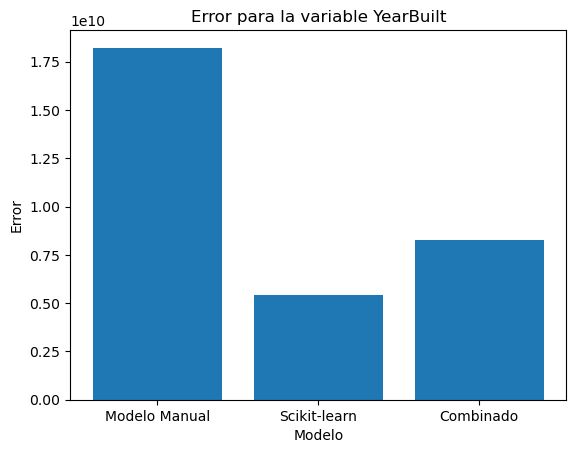

Entrenando modelos para la variable LotFrontage...
Entrenando modelo manualmente...
Entrenando modelo de scikit-learn...
Calculando predicciones combinadas...
Calculando errores...
Error del modelo manual: 18227310340.87736
Error del modelo de scikit-learn: 6510307747.730057
Error del modelo combinado: 9372557187.113474
Conclusión: El modelo de Scikit-learn es el mejor.


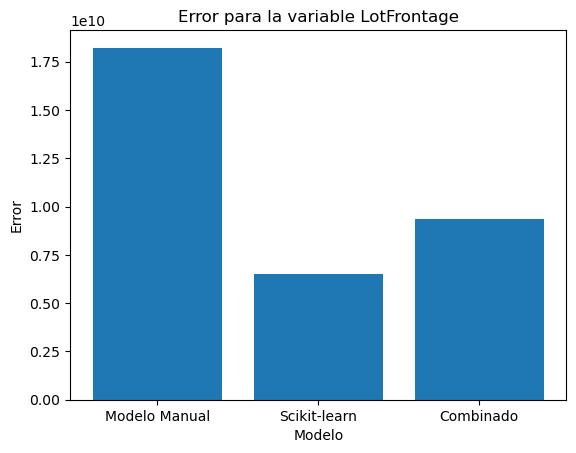

In [30]:
#Entrenamiento de modelo y evaluación para cada variable x

def predict_combined_models(model_manual, model_sklearn, x):
    y_pred_manual = model_manual.predict(x)
    y_pred_sklearn = model_sklearn.predict(x.reshape(-1, 1))
    y_pred_combined = (y_pred_manual + y_pred_sklearn) / 2
    return y_pred_manual, y_pred_sklearn, y_pred_combined

def calculate_errors(y_true, y_pred_manual, y_pred_sklearn, y_pred_combined):
    error_manual = mean_squared_error(y_true, y_pred_manual)
    error_sklearn = mean_squared_error(y_true, y_pred_sklearn)
    error_combined = mean_squared_error(y_true, y_pred_combined)
    return error_manual, error_sklearn, error_combined

def plot_model_errors(error_manual, error_sklearn, error_combined, variable_name):
    plt.bar(['Modelo Manual', 'Scikit-learn', 'Combinado'], [error_manual, error_sklearn, error_combined])
    plt.xlabel('Modelo')
    plt.ylabel('Error')
    plt.title(f'Error para la variable {variable_name}')
    plt.show()

# Validación de Modelos
for current_variable in variables_x:
    print(f"Entrenando modelos para la variable {current_variable}...")
    x_train = df_tr[current_variable].values
    y_train = df_tr['SalePrice'].values  
    x_val = df_val[current_variable].values
    y_val = df_val['SalePrice'].values

    print("Entrenando modelo manualmente...")

    print("Entrenando modelo de scikit-learn...")
    y_pred_sklearn = train_sklearn_model(x_train, y_train, x_val)

    print("Calculando predicciones combinadas...")
    y_pred_combined = combine_predictions(y_pred_manual, y_pred_sklearn)

    print("Calculando errores...")
    error_manual, error_sklearn, error_combined = calculate_errors(y_val, y_pred_manual, y_pred_sklearn, y_pred_combined)

    print(f"Error del modelo manual: {error_manual}")
    print(f"Error del modelo de scikit-learn: {error_sklearn}")
    print(f"Error del modelo combinado: {error_combined}")
    
    if error_manual < error_sklearn:
        print("Conclusión: El modelo manual es el mejor.")
    elif error_sklearn < error_manual:
        print("Conclusión: El modelo de Scikit-learn es el mejor.")
    else:
        print("Ambos modelos tienen el mismo error. Se requiere una evaluación adicional.")

    plot_model_errors(error_manual, error_sklearn, error_combined, current_variable)